In [9]:
# load necessary python libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [10]:
# read the cvs file into Pandas for the Kepler Object data
# this data has previously been MinMax fitted

x_data = pd.read_csv('x_parms.csv')
x_data.head()
x_data.shape


(8744, 40)

In [11]:
# read y values into Pandas for Kepler classification data

y_data = pd.read_csv('y_value.csv')
y_data.head()

,koi_disposition
0,CONFIRMED
1,CONFIRMED
2,FALSE POSITIVE
3,FALSE POSITIVE
4,CONFIRMED


In [12]:
# y_data.values.reshape(-1,1)
# result = y_data.Series['koi_disposition'].ravel()

y_data = y_data['koi_disposition']

In [13]:
y_data.shape

(8744,)

In [14]:
# define training and test data for the Decision Tree model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=5)

In [15]:
# Support vector machine linear classifier
# from sklearn.svm import SVC 
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

from sklearn.svm import SVC
model = SVC(kernel='linear')

In [ ]:
#train SVC model
model.fit(X_train, y_train)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 1.000/0.593


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 3, Train/Test Score: 0.791/0.625


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 5, Train/Test Score: 0.745/0.632


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 7, Train/Test Score: 0.727/0.640


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 9, Train/Test Score: 0.719/0.645


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 11, Train/Test Score: 0.708/0.646


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 13, Train/Test Score: 0.704/0.651


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 15, Train/Test Score: 0.700/0.654


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 17, Train/Test Score: 0.695/0.656


C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 19, Train/Test Score: 0.690/0.647


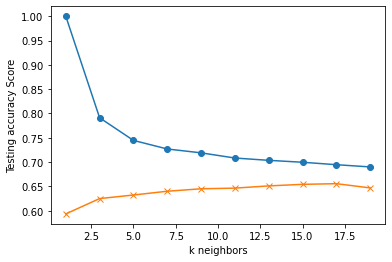

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=15 Test Acc: 0.654


# KNN Classification Score: 0.654